In [3]:
from scope_gen.toy_example.data.distributions import ThreeGaussians
from scope_gen.utils import set_seed
from scope_gen.toy_example.paths import OUTPUT_DIR, CKPT_DIR
import matplotlib.pyplot as plt
import tikzplotlib
import pickle
import torch
import json

set_seed(3)

epsilon = 0.5
colors = json.load(open("./assets/color_scheme.json"))

# load pipeline object
with open(CKPT_DIR + '/pipeline.pkl', 'rb') as file:
          pipeline = pickle.load(file)

samples1, samples2 = pipeline.generate(return_intermediate=True)

'epsilon = 0.5\ncolors = json.load(open("./assets/color_scheme.json"))\n\n# load pipeline object\nwith open(CKPT_DIR + \'/pipeline.pkl\', \'rb\') as file:\n          pipeline = pickle.load(file)\n\nsamples1, samples2 = pipeline.generate(return_intermediate=True)'

In [4]:
distr = ThreeGaussians()
x_min, x_max = -6, 4
y_min, y_max = -5, 5
step = 0.1

# Create the grid
x = torch.arange(x_min, x_max, step)
y = torch.arange(y_min, y_max, step)
x_grid, y_grid = torch.meshgrid(x, y, indexing='ij')
xy = torch.stack((x_grid, y_grid), dim=-1).view(-1, 2)
z = distr.prob(xy).view(x_grid.size(0), y_grid.size(1))
 
extra = distr.sample(num_samples=1)

# Plot samples on top of density
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_title('Conformal Generation')

# Define the levels explicitly
z_min, z_max = z.min().item(), z.max().item()
levels = torch.linspace(z_min, z_max, 13).numpy()

# Plot contour lines
contour = ax.contour(x_grid.numpy(), y_grid.numpy(), z.numpy(), levels=levels, cmap='Oranges', zorder=1)

# Combine all samples and colors
all_samples = torch.cat((samples1, extra), dim=0)
all_colors = [colors["blue"]] * samples1.size(0) + [colors["red"]]

ax.scatter(all_samples[:, 0], all_samples[:, 1], color=all_colors)

# highligh ball within circle
ax = plt.gca()
ball = plt.Circle((extra[0, 0].item(), extra[0, 1].item()), epsilon, color=colors["purple"], fill=True, linewidth=2, alpha=0.5)
ax.add_patch(ball)
# highlight samples within ball
in_ball = torch.norm(samples1 - extra, dim=1) < epsilon
plt.show()
# Save to TikZ
#tikzplotlib.save(OUTPUT_DIR + "/conformal_generation_toy.tex")

/home/kkladny/conformal_prediction_generative_models/PCGen/pcgen/toy_example/models/gaussian_mixture.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


ValueError: Type must be a sub-type of ndarray type

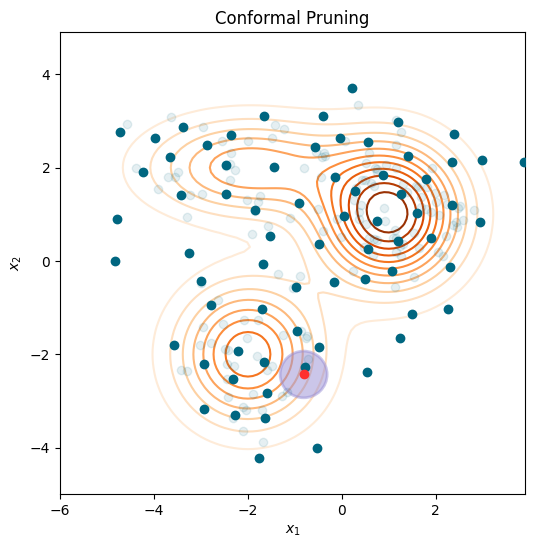

In [ ]:
# Plot samples on top of density
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Conformal Pruning')

# Increase the number of levels
levels = torch.linspace(z.min(), z.max(), 13).numpy()

# Plot contour lines
contour = ax.contour(x_grid.numpy(), y_grid.numpy(), z.numpy(), levels=levels, cmap='Oranges', zorder=1)

# Plot scatter points with different opacities
# Points with reduced opacity
ax.scatter(samples1[:, 0], samples1[:, 1], color=colors["blue"], alpha=0.1, zorder=2)

# Points with full opacity
ax.scatter(samples2[:, 0], samples2[:, 1], color=colors["blue"], zorder=3)

# Plot the extra point with full opacity
ax.scatter(extra[:, 0], extra[:, 1], color=colors["red"], zorder=4)

ax = plt.gca()
ball = plt.Circle((extra[0, 0].item(), extra[0, 1].item()), epsilon, color=colors["purple"], fill=True, linewidth=2, alpha=0.5)
ax.add_patch(ball)
plt.show()
#tikzplotlib.save("conformal_pruning_toy.tex")

In [ ]:
epsilon = 1.0
count = 0
for i in range(1000):
    sample = distr.sample(num_samples=100)
    extra = distr.sample(num_samples=1)
    if torch.norm(sample - extra, dim = -1).min() <= epsilon:
        count += 1
print(count / 1000)

0.977
